In [356]:
import pandas as pd
import numpy as np
import sys
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline 

In [357]:
stock_raw = 'PG.csv'
stock = pd.read_csv(stock_raw, sep=",", header=0)
stock['datetime'] = stock['Date'].apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d'))

In [358]:
x = stock[(stock['datetime'] > '2016-03-01') & (stock['datetime'] < '2016-06-23')]
x = x.sort('datetime')
print x
x = x['Close']


          Date       Open       High        Low      Close    Volume  \
83  2016-03-02  81.580002  82.660004  80.849998  82.550003  12096600   
82  2016-03-03  82.540001  82.930000  82.180000  82.839996   8747100   
81  2016-03-04  82.620003  83.739998  82.260002  83.489998   9406700   
80  2016-03-07  83.180000  83.699997  83.000000  83.099998   6792400   
79  2016-03-08  82.970001  83.750000  82.669998  83.059998   7788400   
78  2016-03-09  83.300003  83.690002  82.680000  82.959999   8954800   
77  2016-03-10  83.129997  83.230003  81.750000  82.279999  10385600   
76  2016-03-11  82.750000  82.800003  81.440002  81.750000  11109500   
75  2016-03-14  81.570000  81.849998  80.680000  81.169998  12389300   
74  2016-03-15  81.000000  81.459999  80.760002  81.309998   9297800   
73  2016-03-16  81.309998  81.800003  80.480003  81.339996   9490300   
72  2016-03-17  81.290001  83.230003  81.279999  82.750000  12061500   
71  2016-03-18  82.860001  83.500000  82.440002  83.150002  3363

/Users/yueshi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [371]:
def gentrends(x, window=1/4.0, charts=True):
    """
    Returns a Pandas dataframe with support and resistance lines.
    :param x: One-dimensional data set
    :param window: How long the trendlines should be. If window < 1, then it
                   will be taken as a percentage of the size of the data
    :param charts: Boolean value saying whether to print chart to screen
    """

    import numpy as np
    import pandas.io.data as pd

    x = np.array(x)

    if window < 1:
        window = int(window * len(x))

    max1 = np.where(x == max(x))[0][0]  # find the index of the abs max
    min1 = np.where(x == min(x))[0][0]  # find the index of the abs min

    # First the max
    if max1 + window > len(x):
        max2 = max(x[0:(max1 - window)])
    else:
        max2 = max(x[(max1 + window):])

    # Now the min
    if min1 + window < len(x):
        min2 = min(x[(min1 + window):])
    else:
        min2 = min(x[0:(min1 - window)])

    # Now find the indices of the secondary extrema
    max2 = np.where(x == max2)[0][0]  # find the index of the 2nd max
    min2 = np.where(x == min2)[0][0]  # find the index of the 2nd min
    
    print max1,max2,x[max1],x[max2]
    print min1,min2,x[min1],x[min2]

    # Create & extend the lines
    maxslope = (x[max1] - x[max2]) / (max1 - max2)  # slope between max points
    minslope = (x[min1] - x[min2]) / (min1 - min2)  # slope between min points
    a_max = x[max1] - (maxslope * max1)  # y-intercept for max trendline
    a_min = x[min1] - (minslope * min1)  # y-intercept for min trendline
    b_max = x[max1] + (maxslope * (len(x) - max1))  # extend to last data pt
    b_min = x[min1] + (minslope * (len(x) - min1))  # extend to last data point
    maxline = np.linspace(a_max, b_max, len(x))  # Y values between max's
    minline = np.linspace(a_min, b_min, len(x))  # Y values between min's

    # OUTPUT
    trends = np.transpose(np.array((x, maxline, minline)))
    trends = pd.DataFrame(trends, index=np.arange(0, len(x)),
                          columns=['Data', 'Max Line', 'Min Line'])
    
    return trends, maxslope, minslope

24 78 83.809998 83.57
38 57 79.550003 80.199997


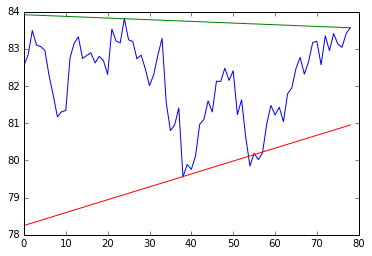

In [372]:
(trends, maxslope, minslope) = gentrends(x)
plt.plot(trends)